# Clustering metrics - alternatives to the _elbow method_
### Dr. Tirthajyoti Sarkar, Fremont, CA 94536

Clustering is an important part of the machine learning pipeline for business or scientific enterprises utilizing data science. As the name suggests, it helps to identify congregations of closely related (by some measure of distance) data points in a blob of data, which, otherwise, would be difficult to make sense of.

A popular method like k-means clustering does not seem to provide a completely satisfactory answer when we ask the basic question: 
> **"How would we know the actual number of clusters, to begin with?"**

This question is critically important because of the fact that the process of clustering is often a precursor to further processing of the individual cluster data and therefore, the amount of computational resource may depend on this measurement. 

In the case of a business analytics problem, repercussion could be worse. Clustering is often done for such analytics with the goal of market segmentation. It is, therefore, easily conceivable that, depending on the number of clusters, appropriate marketing personnel will be allocated to the problem. Consequently, a wrong assessment of the number of clusters can lead to sub-optimum allocation of precious resources.

For the k-means clustering method, the most common approach for answering this question is the so-called elbow method. It involves running the algorithm multiple times over a loop, with an increasing number of cluster choice and then plotting a clustering score as a function of the number of clusters.

In this notebook, we show what metric to use for visualizing and determining an optimal number of clusters much better than the usual practice - elbow method.

---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Create synthetic data using Scikit learn `make_blob` method

- Number of features: 4
- Number of clusters: 5
- Number of samples: 200

In [2]:
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs

In [3]:
n_features = 4
n_cluster = 5
cluster_std = 1.2
n_samples = 200

In [4]:
data1 = make_blobs(n_samples=n_samples,n_features=n_features,centers=n_cluster,cluster_std=cluster_std)

In [5]:
d1 = data1[0]

In [6]:
df1=pd.DataFrame(data=d1,columns=['Feature_'+str(i) for i in range(1,n_features+1)])
df1.head()

,Feature_1,Feature_2,Feature_3,Feature_4
0,1.906877,-8.130899,2.456056,2.266448
1,1.908964,8.770407,2.729598,4.519041
2,2.359446,9.486553,2.034027,4.000280
3,2.907218,-7.497651,4.663393,3.178297
4,5.795718,5.401613,3.378446,6.516193


In [7]:
from itertools import combinations

In [8]:
# all unique unordered tupels with two features of the given dataframe
lst_vars=list(combinations(df1.columns,2))

In [9]:
len(lst_vars)

6

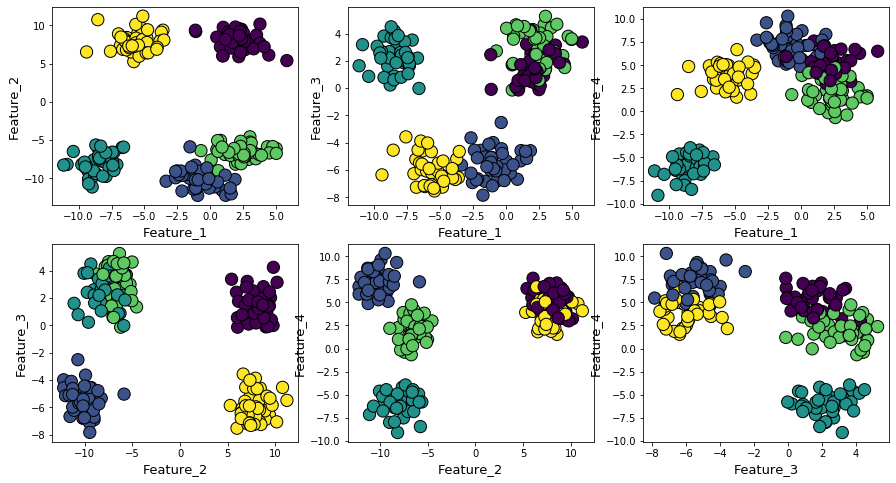

In [12]:
plt.figure(figsize=(15,8))
# the different feature tuple scatter plots
for i in range(1,7):
    plt.subplot(2,3,i)
    dim1=lst_vars[i-1][0]
    dim2=lst_vars[i-1][1]
    plt.scatter(df1[dim1],df1[dim2],c=data1[1],edgecolor='k',s=150)
    plt.xlabel(f"{dim1}",fontsize=13)
    plt.ylabel(f"{dim2}",fontsize=13)

### How are the classes separated (boxplots)

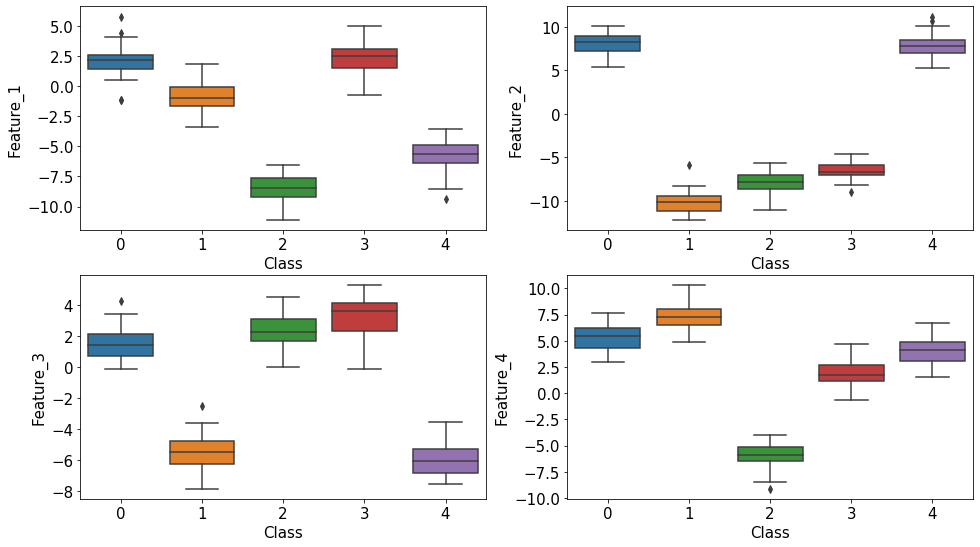

In [14]:
# box plots for the different classes per feature
plt.figure(figsize=(16,14))
for i,c in enumerate(df1.columns):
    plt.subplot(3,2,i+1)
    sns.boxplot(y=df1[c],x=data1[1])
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.xlabel("Class",fontsize=15)
    plt.ylabel(c,fontsize=15)
    #plt.show()

Singular features do not suffice for classification, but two features can suffice

## k-means clustering

In [15]:
from sklearn.cluster import KMeans

### Unlabled data

In [16]:
X=df1

In [17]:
X.head()

,Feature_1,Feature_2,Feature_3,Feature_4
0,1.906877,-8.130899,2.456056,2.266448
1,1.908964,8.770407,2.729598,4.519041
2,2.359446,9.486553,2.034027,4.000280
3,2.907218,-7.497651,4.663393,3.178297
4,5.795718,5.401613,3.378446,6.516193


In [19]:
y=data1[1]

### Scaling

In [24]:
from sklearn.preprocessing import MinMaxScaler

In [25]:
scaler = MinMaxScaler()

In [26]:
X_scaled=scaler.fit_transform(X)

### Metrics

In [27]:
from sklearn.metrics import silhouette_score, davies_bouldin_score,v_measure_score

### Running k-means and computing inter-cluster distance score for various *k* values

In [28]:
km_scores= []
km_silhouette = []
vmeasure_score =[]
db_score = []
# k means for different cluster counts from 2 to 11
for i in range(2,12):
    # Kmeans fitted given scaled data
    km = KMeans(n_clusters=i, random_state=0).fit(X_scaled)
    # classification
    preds = km.predict(X_scaled)
    # calculate different score to evaluate how good the data has been classified
    # K means score
    print("Score for number of cluster(s) {}: {}".format(i,km.score(X_scaled)))
    km_scores.append(-km.score(X_scaled))
    # silhouette score
    silhouette = silhouette_score(X_scaled,preds)
    km_silhouette.append(silhouette)
    print("Silhouette score for number of cluster(s) {}: {}".format(i,silhouette))
    # davies score
    db = davies_bouldin_score(X_scaled,preds)
    db_score.append(db)
    print("Davies Bouldin score for number of cluster(s) {}: {}".format(i,db))
    # v_measure score
    v_measure = v_measure_score(y,preds)
    vmeasure_score.append(v_measure)
    print("V-measure score for number of cluster(s) {}: {}".format(i,v_measure))
    print("-"*100)

Score for number of cluster(s) 2: -43.84930366367115
Silhouette score for number of cluster(s) 2: 0.40200225040117543
Davies Bouldin score for number of cluster(s) 2: 1.2051081754400754
V-measure score for number of cluster(s) 2: 0.5897275217561558
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 3: -26.050945985116034
Silhouette score for number of cluster(s) 3: 0.5176753312029418
Davies Bouldin score for number of cluster(s) 3: 0.9368533421833659
V-measure score for number of cluster(s) 3: 0.7918756684685209
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 4: -12.548771352307128
Silhouette score for number of cluster(s) 4: 0.6332887338160321
Davies Bouldin score for number of cluster(s) 4: 0.5838683331093957
V-measure score for number of cluster(s) 4: 0.905746099275519
----------------------------------------------------

Davies Bouldin score get worse after 5, v_measure largest at 5, Silhouette score maximal at 5, k_means monotonically decreasing

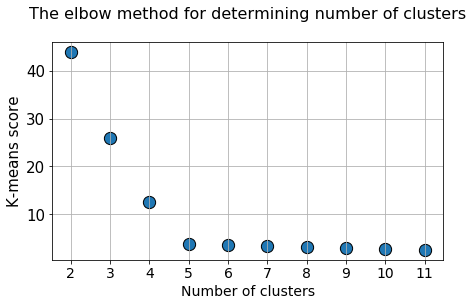

In [30]:
plt.figure(figsize=(7,4))
plt.title("The elbow method for determining number of clusters\n",fontsize=16)
plt.scatter(x=[i for i in range(2,12)],y=km_scores,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("K-means score",fontsize=15)
plt.xticks([i for i in range(2,12)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()

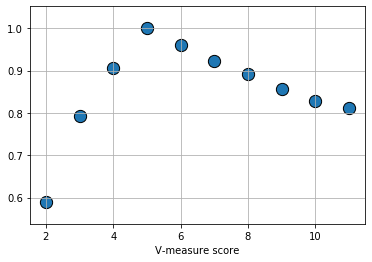

In [31]:
plt.scatter(x=[i for i in range(2,12)],y=vmeasure_score,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("V-measure score")
plt.show()

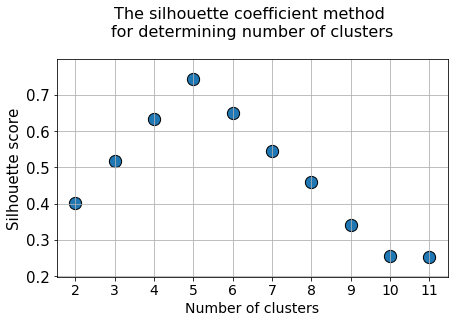

In [32]:
plt.figure(figsize=(7,4))
plt.title("The silhouette coefficient method \nfor determining number of clusters\n",fontsize=16)
plt.scatter(x=[i for i in range(2,12)],y=km_silhouette,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("Silhouette score",fontsize=15)
plt.xticks([i for i in range(2,12)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()

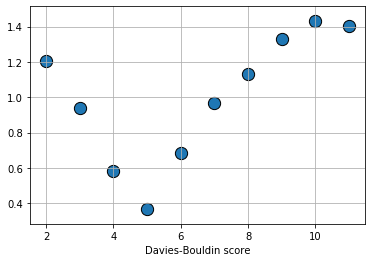

In [33]:
plt.scatter(x=[i for i in range(2,12)],y=db_score,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Davies-Bouldin score")
plt.show()

## Expectation-maximization (Gaussian Mixture Model)

In [35]:
from sklearn.mixture import GaussianMixture

In [43]:
gm_bic= []
gm_score=[]
for i in range(2,15):
    # Gaussian Mixture analysis with i clusters fit to data
    gm = GaussianMixture(n_components=i,n_init=10,tol=1e-3,max_iter=1000).fit(X_scaled)
    print("BIC for number of cluster(s) {}: {}".format(i,gm.bic(X_scaled)))
    print("Log-likelihood score for number of cluster(s) {}: {}".format(i,gm.score(X_scaled)))
    print("-"*100)
    # bayes infomration criteria for the scaled data
    gm_bic.append(-gm.bic(X_scaled))
    # score
    gm_score.append(gm.score(X_scaled))

BIC for number of cluster(s) 2: -646.9314187031226
Log-likelihood score for number of cluster(s) 2: 2.0014565558325392
----------------------------------------------------------------------------------------------------
BIC for number of cluster(s) 3: -924.9019772414867
Log-likelihood score for number of cluster(s) 3: 2.8950698534240007
----------------------------------------------------------------------------------------------------
BIC for number of cluster(s) 4: -1013.1108954098361
Log-likelihood score for number of cluster(s) 4: 3.3142790500904256
----------------------------------------------------------------------------------------------------
BIC for number of cluster(s) 5: -1087.4123463421934
Log-likelihood score for number of cluster(s) 5: 3.69871957866687
----------------------------------------------------------------------------------------------------
BIC for number of cluster(s) 6: -1058.3310628205486
Log-likelihood score for number of cluster(s) 6: 3.8247032711083095


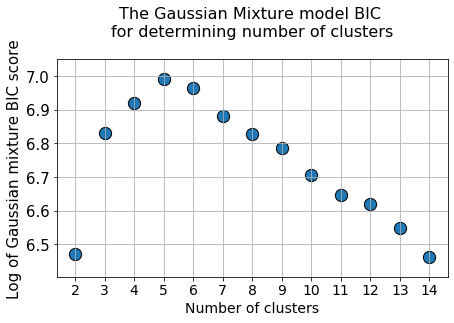

In [44]:
plt.figure(figsize=(7,4))
plt.title("The Gaussian Mixture model BIC \nfor determining number of clusters\n",fontsize=16)
plt.scatter(x=[i for i in range(2,15)],y=np.log(gm_bic),s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("Log of Gaussian mixture BIC score",fontsize=15)
plt.xticks([i for i in range(2,15)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()

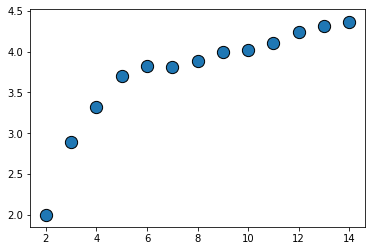

In [45]:
plt.scatter(x=[i for i in range(2,15)],y=gm_score,s=150,edgecolor='k')
plt.show()